# Barycenter with GWtil and CTtil

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import numpy as np
from fgw.dist import cttil_Z
from scipy.optimize import linesearch, minimize, approx_fprime
from fgw.cttil_bary import solve_A_from_Z
from fgw.gwtil_bary import optimize_Z_gwtil_ub, optimize_Z_gwtil_lb
from fgw.data_loader import build_noisy_circular_graph
from fgw.utils import generate_graph
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
np.random.seed(0)


In [2]:
# Gs = [build_noisy_circular_graph(np.random.randint(15, 25),
#                                  with_noise=False,
#                                  structure_noise=True,
#                                  p=3) for _ in range(9)]
Gs = [build_noisy_circular_graph(15,
                                 with_noise=False,
                                 structure_noise=False,
                                 p=3) for _ in range(1)]
# Gs = [generate_graph(np.random.randint(15, 25), 2, g_type="path")]
N = 16

Ls = [nx.laplacian_matrix(g.nx_graph) for g in Gs]
Zs = [np.linalg.inv(Ls[i] + np.ones(Ls[i].shape) / Ls[i].shape[0]) for i in range(len(Ls))]
Ds = [cttil_Z(z) for z in Zs]
ps = [np.ones(Ls[i].shape[0]) / Ls[i].shape[0] for i in range(len(Ls))]
lambdas = np.ones(len(Gs)) / len(Gs)
p = np.ones(N) / N


(-0.6093750000000014, 1.390625000000002)

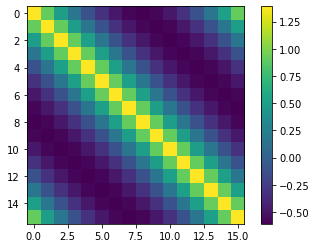

In [3]:
plt.imshow(Zs[0])
plt.colorbar()
Zs[0].min(), Zs[0].max()

## based on GWtil_ub

In [4]:
print("from sample init")
# Z_opt = optimize_Z_gwtil_ub(N, Ds, Zs, ps, p, lambdas, Z_init=Zs[0])
print("from random init")
Z_opt = optimize_Z_gwtil_ub(N, Ds, Zs, ps, p, lambdas)


from sample init
from random init
obj 5.2677 ||g|| 2.1543
obj 1.5580 ||g|| 1.0052
obj 0.4951 ||g|| 0.1904
obj 0.3509 ||g|| 0.1742
obj 0.2211 ||g|| 0.1937
obj 0.1739 ||g|| 0.1912
obj 0.0969 ||g|| 0.1630
obj 0.0207 ||g|| 0.0822
obj 0.0119 ||g|| 0.0358
obj 0.0100 ||g|| 0.0183
obj 0.0096 ||g|| 0.0182
obj 0.0088 ||g|| 0.0188
obj 0.0075 ||g|| 0.0204
obj 0.0054 ||g|| 0.0239
obj 0.0035 ||g|| 0.0266
obj 0.0025 ||g|| 0.0231
obj 0.0015 ||g|| 0.0147
obj 0.0012 ||g|| 0.0096
obj 0.0010 ||g|| 0.0070
obj 0.0009 ||g|| 0.0066
obj 0.0008 ||g|| 0.0074
obj 0.0007 ||g|| 0.0088
obj 0.0004 ||g|| 0.0095
obj 0.0002 ||g|| 0.0075
obj 0.0001 ||g|| 0.0036
obj 0.0000 ||g|| 0.0016
obj 0.0000 ||g|| 0.0013
obj 0.0000 ||g|| 0.0012
obj 0.0000 ||g|| 0.0011
obj 0.0000 ||g|| 0.0013
obj 0.0000 ||g|| 0.0015
obj 0.0000 ||g|| 0.0014
obj 0.0000 ||g|| 0.0010
obj 0.0000 ||g|| 0.0004
obj 0.0000 ||g|| 0.0002
obj 0.0000 ||g|| 0.0002
obj 0.0000 ||g|| 0.0002
obj 0.0000 ||g|| 0.0002
obj 0.0000 ||g|| 0.0002
obj 0.0000 ||g|| 0.0002
obj 0.

(-0.9997410182515195, 1.3908058673663377)

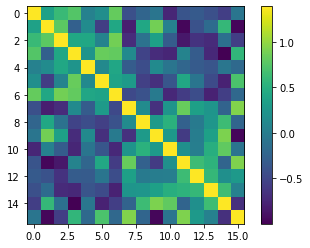

In [5]:
plt.imshow(Z_opt)
plt.colorbar()
Z_opt.min(), Z_opt.max()


(-0.8621234987250401, 2.939543799125557, 0.0)

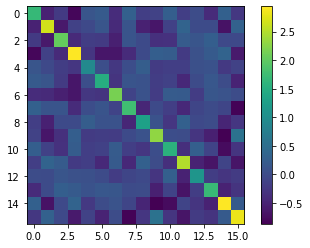

In [6]:
L = np.linalg.pinv(Z_opt) - np.ones((N, N)) / N
plt.imshow(L)
plt.colorbar()
(L.min(), L.max(), L.sum())


(0, 1)

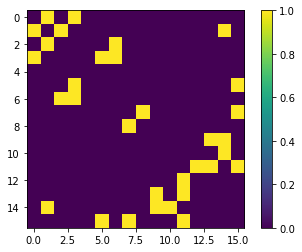

In [7]:
A = solve_A_from_Z(Z_opt)
plt.imshow(A)
plt.colorbar()
A.min(), A.max()

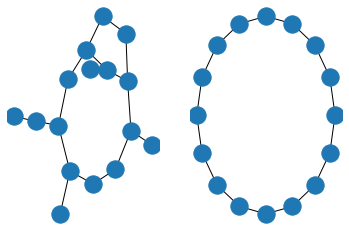

In [9]:
# A = np.fix(A).astype(int)
# print(A)
G = nx.from_numpy_array(A)
plt.subplot(1, 2, 1)
nx.draw(G, pos=nx.kamada_kawai_layout(G))
plt.subplot(1, 2, 2)
nx.draw(Gs[0].nx_graph, pos=nx.kamada_kawai_layout(Gs[0].nx_graph))


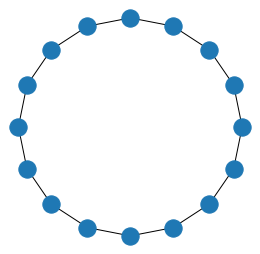

In [11]:
plt.figure(figsize=(15,15))
for i in range(1):
    plt.subplot(3,3, i+1)
    nx.draw(Gs[i].nx_graph, pos=nx.kamada_kawai_layout(Gs[i].nx_graph))